In [183]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
ns = np.array([20, 100])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

,n,mean_min,mean_max,dev_min,dev_max
0,20,-0.434162,0.374849,0.663480,1.252336
1,100,-0.117590,0.248381,0.810296,1.070570


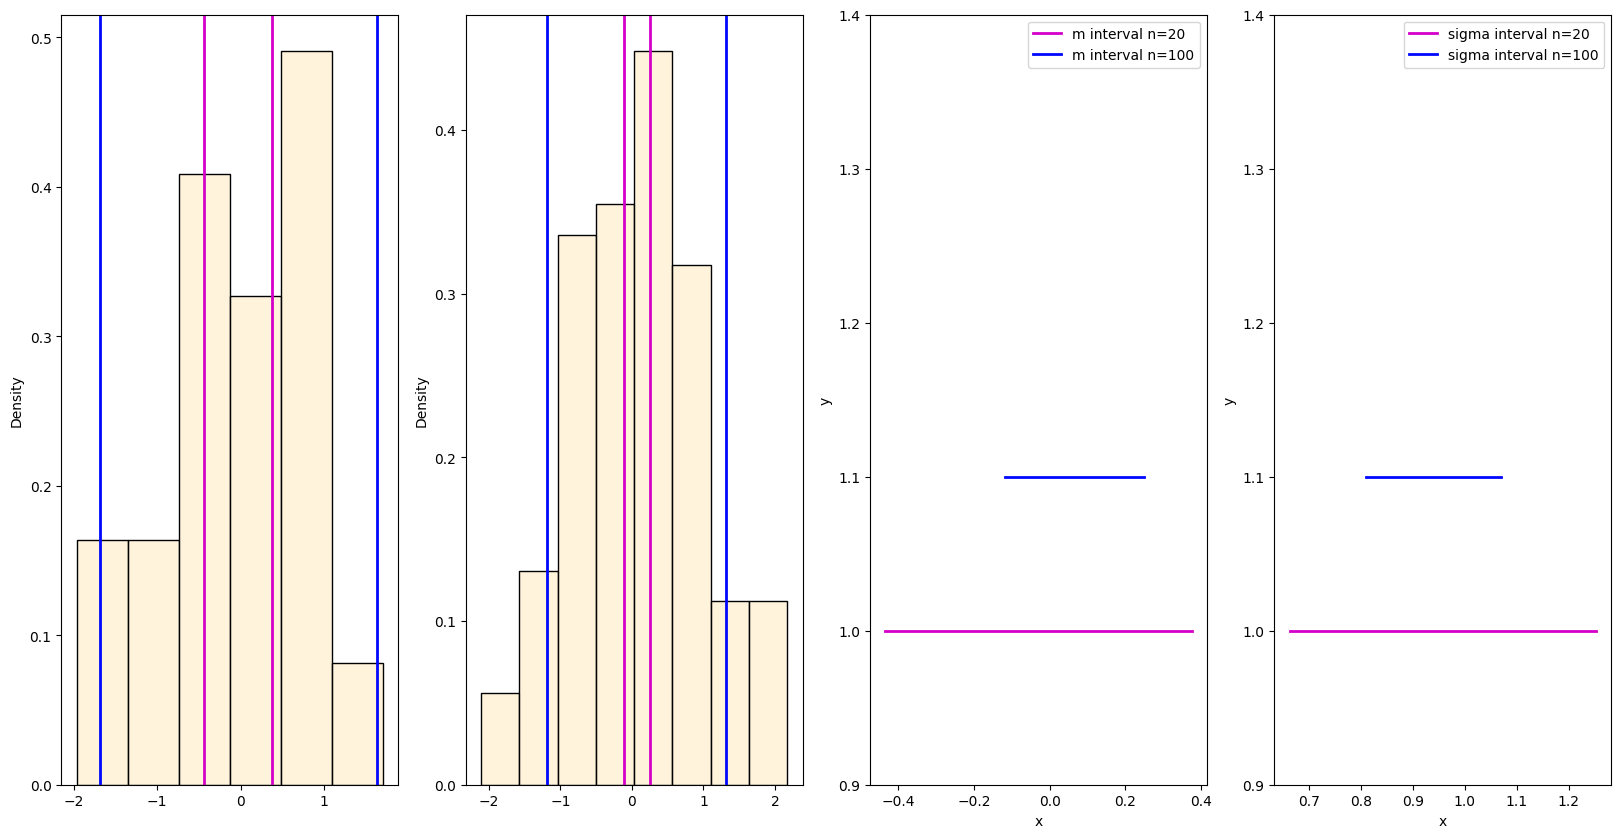

In [185]:
significance = 0.05
confidence_level = 1 - significance / 2 # 0.975

data = {
  'n': [],
  'mean_min': [],
  'mean_max': [],
  'dev_min': [],
  'dev_max': [],
}

figure, axes = plt.subplots(1, len(ns) * 2, figsize=(20, 10))

for index, n in enumerate(ns):
  sample = np.random.normal(0, 1, n)
  mean = sample.mean()
  dev = np.std(sample)
  student_value = scipy.stats.t.ppf(confidence_level, n)
  chi_square_value_min = scipy.stats.chi2.ppf(1 - significance / 2, n)
  chi_square_value_max = scipy.stats.chi2.ppf(significance / 2, n)

  mean_min = mean - dev * student_value / math.sqrt(n)
  mean_max = mean + dev * student_value / math.sqrt(n)

  dev_min = math.sqrt(n) * dev / math.sqrt(chi_square_value_min)
  dev_max = math.sqrt(n) * dev / math.sqrt(chi_square_value_max)

  data['n'].append(n)
  data['mean_min'].append(mean_min)
  data['mean_max'].append(mean_max)
  data['dev_min'].append(dev_min)
  data['dev_max'].append(dev_max)

  sns.histplot(sample, ax=axes[index], stat='density', color='#FFEFD0')
  axes[index].axvline(x=mean_min, color='#D400C9', linewidth=2)
  axes[index].axvline(x=mean_max, color='#D400C9', linewidth=2)
  axes[index].axvline(x=mean_min - dev_max, color='#0007FF', linewidth=2)
  axes[index].axvline(x=mean_max + dev_max, color='#0007FF', linewidth=2)

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][0], data['mean_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[2], color='#D400C9', label='m interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['mean_min'][1], data['mean_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[2], color='#0007FF', label='m interval n=100', linewidth=2)
axes[2].set_ylim(0.9, 1.4)
axes[2].legend()

sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][0], data['dev_max'][0]]),
  'y': np.array([1, 1]),
}, ax=axes[3], color='#D400C9', label='sigma interval n=20', linewidth=2)
sns.lineplot(x='x', y='y', data={
  'x': np.array([data['dev_min'][1], data['dev_max'][1]]),
  'y': np.array([1.1, 1.1]),
}, ax=axes[3], color='#0007FF', label='sigma interval n=100', linewidth=2)
axes[3].set_ylim(0.9, 1.4)
axes[3].legend()

figure.savefig('plots/hists.png')

result_df = pd.DataFrame(data)
result_df.to_csv('results/normal.csv', index=False)
result_df

In [186]:
significance = 0.05
confidence_level = 1 - significance / 2 # 0.975

data = {
  'n': [],
  'mean_min': [],
  'mean_max': [],
  'dev_min': [],
  'dev_max': [],
}

for index, n in enumerate(ns):
  sample = np.random.random(n)
  mean = sample.mean()
  s = math.sqrt(((sample - mean) ** 2 / n).sum())
  m4 = ((sample - mean) ** 4).sum() / n
  e = m4 / s ** 4 - 3
  student_value = scipy.stats.t.ppf(confidence_level, n)

  dev_min = s * (1 - 0.5 * student_value * math.sqrt(e + 2) / 10)
  dev_max = s * (1 + 0.5 * student_value * math.sqrt(e + 2) / 10)

  mean_min = mean - dev * student_value / math.sqrt(n)
  mean_max = mean + dev * student_value / math.sqrt(n)

  data['n'].append(n)
  data['mean_min'].append(mean_min)
  data['mean_max'].append(mean_max)
  data['dev_min'].append(dev_min)
  data['dev_max'].append(dev_max)

result_df = pd.DataFrame(data)
result_df.to_csv('results/random.csv', index=False)
result_df

,n,mean_min,mean_max,dev_min,dev_max
0,20,0.107262,0.967666,0.287296,0.331802
1,100,0.305228,0.671199,0.279724,0.332851
